* Цель:
    Научиться использовать модели скользящего среднего (Moving Average) и ARIMA для прогнозирования временного ряда, 
    используя встроенный датасет flights из библиотеки seaborn, а также освоить автоматический подбор параметров модели ARIMA с помощью auto_arima.
* Описание задания:
    Ваша задача — проанализировать данные о количестве авиапассажиров, построить модель скользящего среднего (MA) и модель ARIMA, 
    автоматически подобрать параметры для ARIMA с помощью библиотеки auto_arima, а затем сравнить прогнозы обеих моделей.
* Шаги:
    1. Загрузка данных:
        - Используйте встроенный датасет flights из библиотеки seaborn.
    2. Простое сглаживание (Moving Average):
        - Примените скользящее среднее с окном 12 месяцев (один год) для данных.
        - Постройте график с исходными данными и результатом применения скользящего среднего.
    3. Подбор параметров ARIMA с помощью auto_arima:
        - Используйте библиотеку pmdarima для автоматического подбора параметров модели ARIMA.
        - Подберите оптимальные параметры ARIMA и выведите их на экран.
    4. Построение и прогноз модели ARIMA:
        - Постройте модель ARIMA с подобранными параметрами.
        - Сделайте прогноз на следующие 12 месяцев и выведите его на график.
    5. Сравнение:
        - Сравните результаты скользящего среднего и ARIMA на одном графике.
        - Сделайте выводы: какие прогнозы более точные и стабильные?

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


flights = sns.load_dataset('flights')

flights['month'] = pd.to_datetime(flights['month'], format='%b').dt.month

flights.head()

,year,month,passengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121


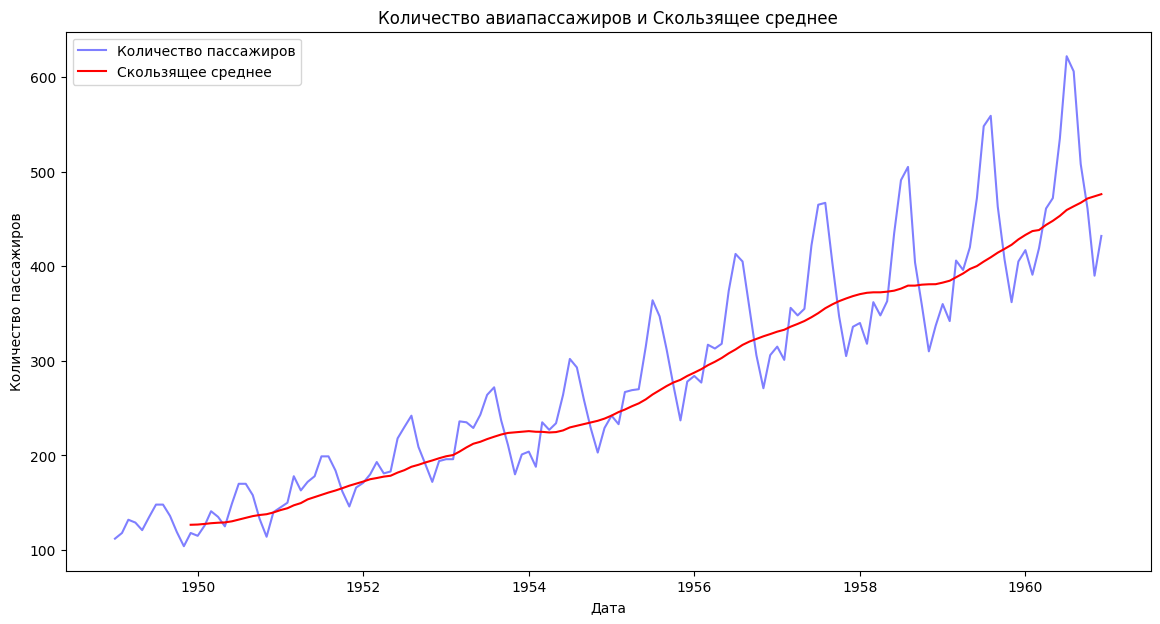

In [4]:
flights['date'] = pd.to_datetime(flights[['year', 'month']].assign(day=1))
data = flights.set_index('date')['passengers']


moving_average = data.rolling(window=12).mean()


plt.figure(figsize=(14, 7))
plt.plot(data, label='Количество пассажиров', color='blue', alpha=0.5)
plt.plot(moving_average, label='Скользящее среднее', color='red')
plt.title('Количество авиапассажиров и Скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [5]:
from pmdarima import auto_arima


model = auto_arima(data, seasonal=True, m=12, trace=True,
                    error_action='ignore', suppress_warnings=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=2.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.14 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.80 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.32 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.68 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.23 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.76 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=1.00 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=2.12 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.95 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(3,1,1)(0,1,0

In [ ]:
train = data[:-12]
test = data[-12:]


model.fit(train)


forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)


forecast_index = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


plt.figure(figsize=(14, 7))
plt.plot(train, label='Обучающая выборка', color='blue', alpha=0.5)
plt.plot(test, label='Тестовая выборка', color='orange', marker='o')
plt.plot(forecast_index, forecast, label='Прогноз ARIMA', color='green', marker='x')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.title('Прогноз ARIMA на 12 месяцев')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data, label='Количество пассажиров', color='blue', alpha=0.5)
plt.plot(moving_average, label='Скользящее среднее', color='red', linestyle='--')
plt.plot(forecast_index, forecast, label='Прогноз ARIMA', color='green', marker='x')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.title('Сравнение Скользящего среднего и Прогноза ARIMA')
plt.xlabel('Дата')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()